# Famous Datasets

There are a number of datasets that any data scientist will be familiar with. We're going to use several today to practice data visualization.

* [Iris Dataset](http://archive.ics.uci.edu/ml/datasets/Iris) This data set was collected by the famous statistician R. Fisher in the 1930s. First read about the data set and its features.
* [Abalone Dataset](http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all) Various measurements of a type of snail
* [Boston Housing](https://archive.ics.uci.edu/ml/datasets/Housing) Housing prices alone with various supplemental data, such as local crime rates
* [Motor Trend Cars](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
* [Salary Data](https://archive.ics.uci.edu/ml/datasets/Adult)

Seaborn also includes some [additional datasets](https://github.com/mwaskom/seaborn-data).


In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

First let's try a some function plotting.

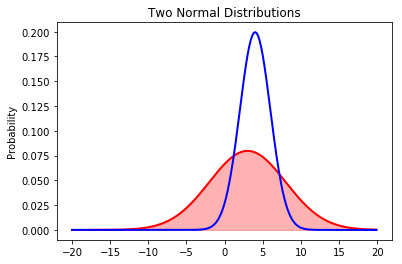

In [2]:
# Plot two normal distributions
domain = np.arange(-20, 20, 0.1)
values = stats.norm(3, 5).pdf(domain)
plt.plot(domain, values, color='r', linewidth=2)
plt.fill_between(domain, 0, values, color='r', alpha=0.3)
values = stats.norm(4, 2).pdf(domain)
plt.plot(domain, values, color='b', linewidth=2)
plt.ylabel("Probability")
plt.title("Two Normal Distributions")
plt.show()


Read the lines in the previous example closely and make sure you understand what each line is doing. It's ok if you don't understand all the arguments, you'll pick those up as we go. Remember that you can also shift-tab inside a function to see all the argument options.

If you want your plots to pop out so you can resize them, use
`%matplotlib`
to undo the effect of
`%matplotlib inline`

In [3]:
# Run this in to undo the effects of %matplotlib inline use to see the effects. 
# Run the visual below. 
# Now try reruning the visual above
# What happened?
%matplotlib 

Using matplotlib backend: Qt5Agg


In [4]:
# Plot two normal distributions
domain = np.arange(-20, 20, 0.1)
values = stats.norm(3, 5).pdf(domain)
plt.plot(domain, values, color='r', linewidth=2)
plt.fill_between(domain, 0, values, color='r', alpha=0.3)
values = stats.norm(4, 2).pdf(domain)
plt.plot(domain, values, color='b', linewidth=2)
plt.ylabel("Probability")
plt.title("Two Normal Distributions")
plt.show()
%matplotlib inline

In [5]:
%matplotlib
# Load the Iris Dataset

# This is a bit different than how I've been running in data before. What is this method doing?

df = pd.read_csv(os.path.join("../datasets", "iris.data"), sep=',')
df.head()

# Fun fact - many of these example datasets are used all over the world of python. You'll find many packages like scikit learn
# & Seaborne will allow you to import them directly. Example:
# iris = sns.load_dataset("iris")
# iris.head()

Using matplotlib backend: Qt5Agg


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


* Which columns are categorical, which are continuous?  
  Answer: species is categorical. Sepal length, petal length, sopal width and petal width are all continuous.
* Let's use seaborn's [pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) to get a quick look at the data

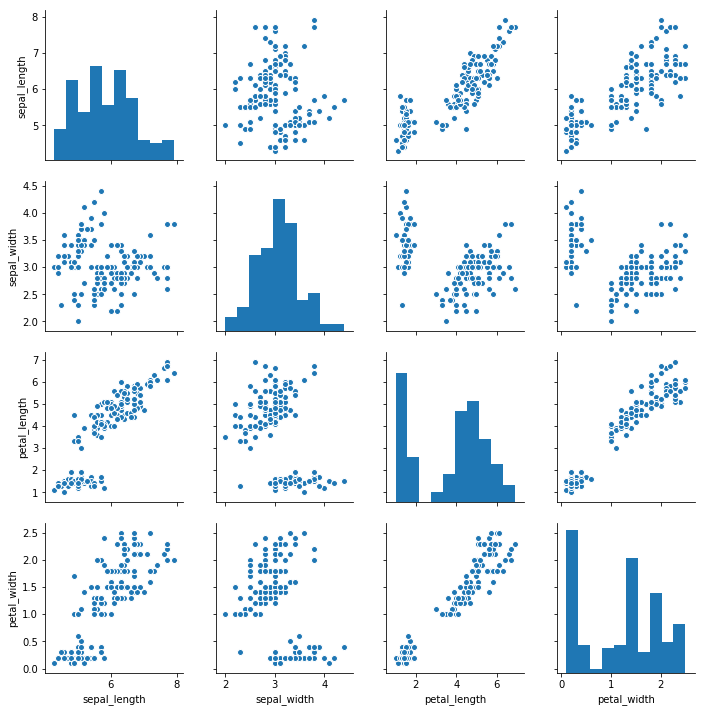

In [6]:
# This special jupyter command causes plots to render in the notebook
%matplotlib inline
sns.pairplot(df)

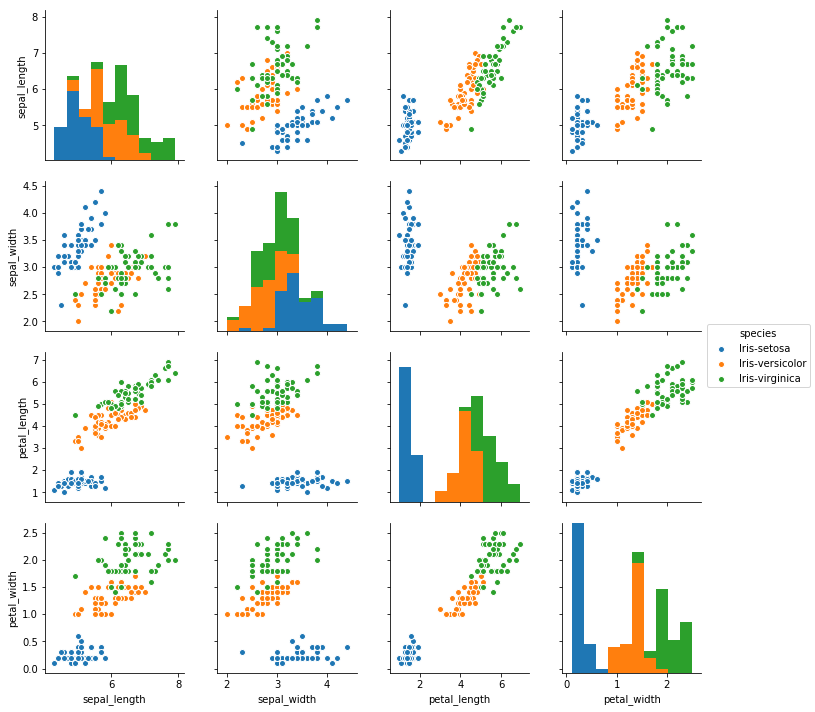

In [7]:
# Seaborn can also color the data by category:
sns.pairplot(df, hue="species")

# Matplotlib

Seaborn makes nice plots but offers less control over the results versus matplotlib (on which seaborn is based). Let's look at the following example.

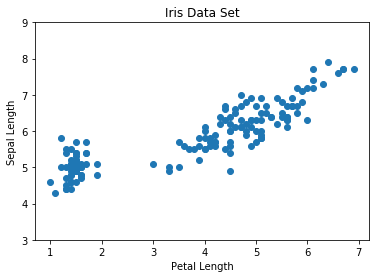

In [8]:
# Make a scatter plot
plt.scatter(df["petal_length"], df["sepal_length"])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.ylim(3, 9)
plt.title("Iris Data Set")
plt.show()

Note that our axes are more nicely labeled when we manually set the names. Matplotlib has a ton of customizability: you can change point shapes and sizes, colors, axes ranges, font sizes, and just about anything else.

We can also invoke matplotlib via pandas directly from the data frame.

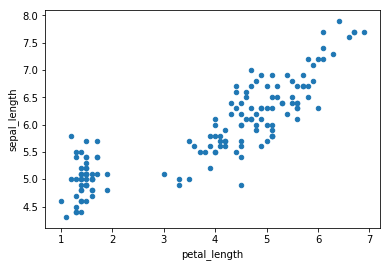

In [9]:
df.plot.scatter("petal_length", "sepal_length")

## Exercise 1
We can make histograms in several ways. Make a histogram of "Sepal Width" from the Iris data set:
* Using matplotlib's `plt.hist`
* Using pandas `df.plot.hist`
* Using seaborn's [distplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html)

Seaborn automatically includes a curve fit, which is sometimes not wanted. Look up the keyword argument to turn off the curve fit. Also checkout [this example](https://en.wikipedia.org/wiki/File:Fisher_iris_versicolor_sepalwidth.svg) from wikipedia.

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

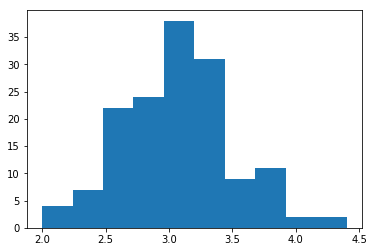

In [10]:
plt.hist(df.sepal_width) 
# alterntaive syntax:
# plt.hist(df['sepal_width'])

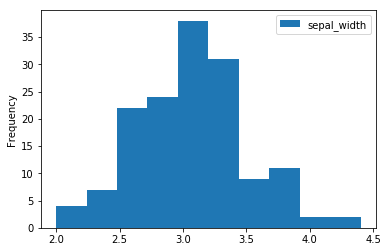

In [11]:
df[['sepal_width']].plot.hist()
# Note that first we select a dataframe that only includes the data we want
# We could also select it by series because pandas Series also have the plot method
# df['sepal_width'].plot.hist()
# df.sepal_width.plot.hist()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


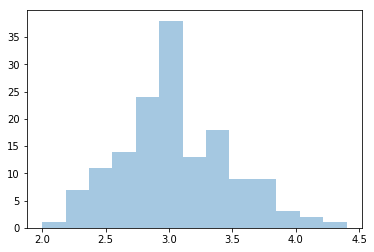

In [12]:
sns.distplot(df[['sepal_width']], kde=False)

# Categorical Data
Seaborn has some nice functions to plot [categorical data](https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html)

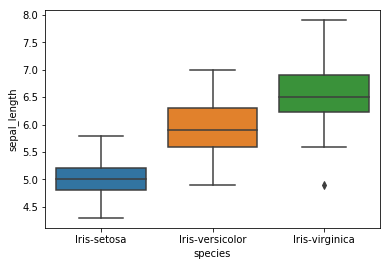

In [13]:
sns.boxplot(x="species", y="sepal_length", data=df)

## Exercise 2

Read the seaborn page on categorical data above and make the following plots:
* sepal_width by category with a boxplot and a swarmplot
* petal_length by category with a violinplot and a swarmplot

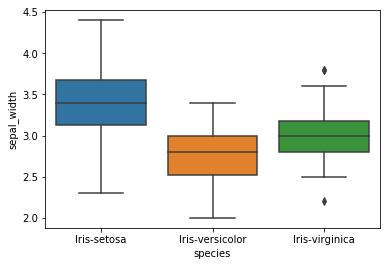

In [14]:
sns.boxplot(x='species', y='sepal_width', data=df)

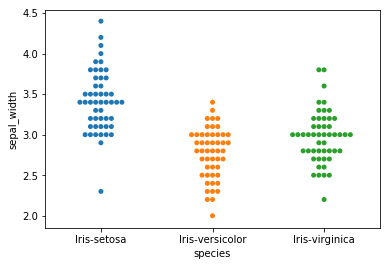

In [15]:
sns.swarmplot(x='species', y='sepal_width', data=df)

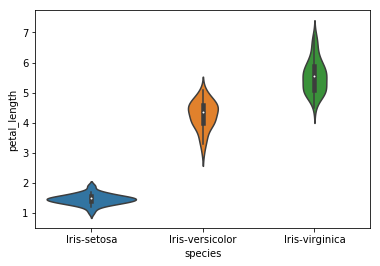

In [16]:
sns.violinplot(x='species', y='petal_length', data=df)

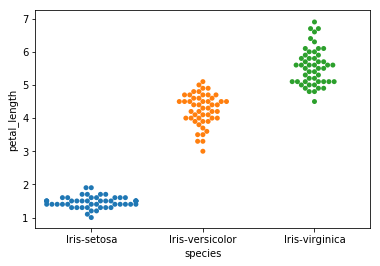

In [17]:
sns.swarmplot(x='species', y='petal_length', data=df)

# Time Series plots

Matplotlib and Seaborn can make some nice plots associated to time series data. For example, we can make plots of running. The following data contains the monthly price of the ETF VTI (a stock market index fund) over time

In [18]:
df = pd.read_csv(os.path.join("../datasets", "vti.csv"))
df.sort_values(by="Date", inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
174,2001-06-15,110.849998,113.620003,110.059998,113.000000,463900,43.218014
173,2001-07-02,112.599998,113.940002,106.800003,110.839996,232600,42.391899
172,2001-08-01,111.199997,112.400002,103.410004,104.349998,81800,39.909733
171,2001-09-04,104.339996,106.070000,86.800003,94.949997,266200,36.444244
170,2001-10-01,94.199997,101.150002,93.309998,96.900002,572700,37.192707


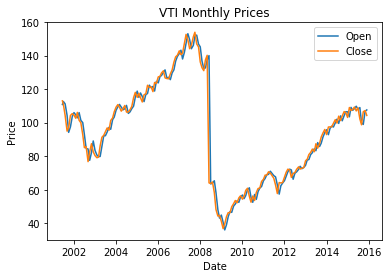

In [19]:
plt.plot(df["Date"], df["Open"], label="Open")
plt.plot(df["Date"], df["Close"], label="Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("VTI Monthly Prices")
plt.legend()
plt.show()

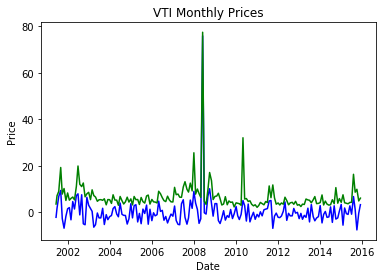

In [20]:
plt.plot(df["Date"], df["Open"] - df["Close"], label="Close-Open", color ='b')
plt.plot(df["Date"], df["High"] - df["Low"], label="High-Low", color ='g')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("VTI Monthly Prices")
plt.show()

## Exercise

Make a plot that is composed of two plots, vertically stacked of:
* The closing price
* The volume

You can do this with matplotlib's [gridspec](http://matplotlib.org/users/gridspec.html).

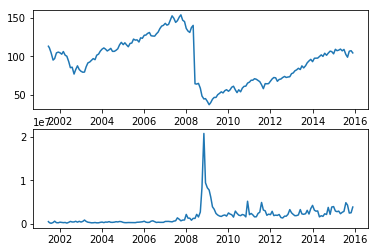

In [21]:
# Fill in the details
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1) # rows and columns
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax1.plot(df["Date"], df["Close"], label="Close")
ax2.plot(df["Date"], df["Volume"], label="Volume")

You can also use multiple y-axes as follows:

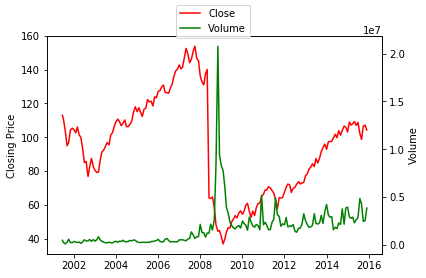

In [22]:
# Fill in the details, see http://matplotlib.org/examples/api/two_scales.html
fig, ax1 = plt.subplots()
ax1.plot(df["Date"], df["Close"], 'r')
ax1.set_ylabel("Closing Price")

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Volume"], 'g')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

fig.legend(loc=9)

plt.show()

We can also easily make smoothed curves by computing means over moving windows.

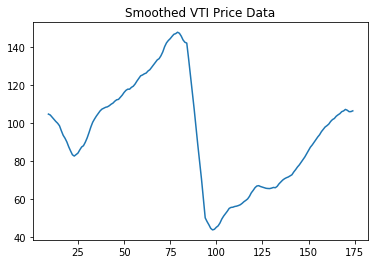

In [23]:
%matplotlib inline
rolling_mean = df["Open"].rolling(window=10).mean()
plt.plot(range(len(rolling_mean)), rolling_mean)
plt.title("Smoothed VTI Price Data")
plt.show()

Compare to the [visualizations here](http://finviz.com/quote.ashx?t=VTI). You can always put more work into a visualization's aesthetics, so focus on accuracy and proper labelling at first.

## Error bars and filled plots

Often we want to indicate that our data is noisy or contains measurement error. Let's construct a dataset.

In [24]:
# Check: do you understand this code?
import numpy as np
from scipy import stats
import random
data = []
for i in range(50):
    m = random.randint(5 + i, 15 + i)
    s = random.randint(4, 8)
    dist = stats.norm(m, s)
    draws = dist.rvs(30)
    data.append([np.mean(draws), np.std(draws)])
df = pd.DataFrame(data, columns=["Mean", "Std"])
df.head()

,Mean,Std
0,7.365512,7.113095
1,14.429699,6.654386
2,8.895495,4.425677
3,11.963823,7.031332
4,14.698688,8.460419


Text(0.5,1,'Error Bar Example')

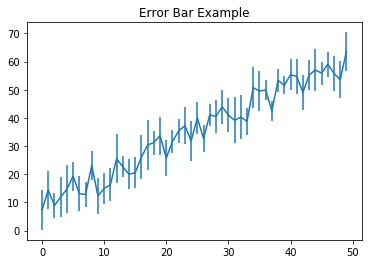

In [25]:
# Now we can plot with error bars
plt.errorbar(range(len(df)), df["Mean"], yerr=df["Std"])
plt.title("Error Bar Example")

Text(0.5,1,'CI Example')

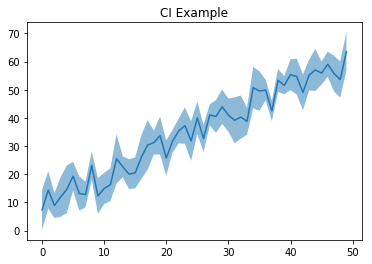

In [26]:
# Confidence interval: 68%
plt.errorbar(range(len(df)), df["Mean"])
lower = df["Mean"] - df["Std"]
upper = df["Mean"] + df["Std"]
plt.fill_between(range(len(df)), lower, upper, alpha=0.5)
plt.title("CI Example")

## Exercise

* Modify the previous example to a 95% confidence interval (two standard deviations).
* Try to make a similar plot with the Mauna Loa atmospheric carbon data set "co2_mm_mlo.txt"

In [27]:
import pandas as pd
columns = ["year", "month", "decimal_date", "average", "interpolated", "trend", "days"]
df = pd.read_csv(os.path.join("../datasets", "co2_mm_mlo.txt"), comment="#",
                delim_whitespace=True, names=columns)

# Can still be read in our normal way too
#df = pd.read_csv("../datasets/co2_mm_mlo.txt", comment="#",
 #               delim_whitespace=True, names=columns)
df.head()

,year,month,decimal_date,average,interpolated,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1



## Exercises
For each of the remaining data sets:
* [Abalone Dataset](http://archive.ics.uci.edu/ml/datasets/Abalone?pagewanted=all) Various measurements of a type of snail
* [Boston Housing](https://archive.ics.uci.edu/ml/datasets/Housing) Housing prices alone with various supplemental data, such as local crime rates
* [Motor Trend Cars](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)
* [Salary Data](https://archive.ics.uci.edu/ml/datasets/Adult)

Work through the following exercises:
* Make a pairplot on a subset of four categories (if possible). Use the vars=["column1", "columnb", ..] to prevent seaborn from making too many plots
* Pick two continuous variables and make a scatter plot with matplotlib, a density plot with seaborn, and a joint plot with seaborn
* If there are any categorical variables, make boxplots and violin plots for each of the categorical variables
* Make at least one plot that has dual-axes or two stacked plots

Feel free to try to make any other plots that might seem interesting! If so please share with the class.


In [28]:
# The boston dataset is unfortunately extremely commonly used.
# It's so common it's included in sklearn so it can be inflicted upon new students of machine learning

from sklearn.datasets import load_boston
boston_data_bunch = load_boston() 
# load_boston() returns the data in a special dictionary called a bunch.  We can get everything out of here.
column_names = boston_data_bunch.feature_names
X_values = boston_data_bunch.data
y_values = boston_data_bunch.target

Notice that X is capitalized and y is lowercase. This is a common mathematical notation to indicate the X is many columns while y is a single column.  Now we can load the data into pandas:

In [29]:
boston = pd.DataFrame(X_values)
y = pd.DataFrame(y_values)
boston = pd.concat([boston, y])
boston.columns=column_names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


For the remaining datasets you could download them as a csv and load them with pd.read_csv.  However in this example I will load them from the web so that there aren't any path problems.

In [30]:
abalone = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
abalone.columns = ["sex", "length", "diameter", "height", "weight.whole",
 "weight.shucked", "weight.viscera", "weight.shell", "rings"]

abalone.head()

,sex,length,diameter,height,weight.whole,weight.shucked,weight.viscera,weight.shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


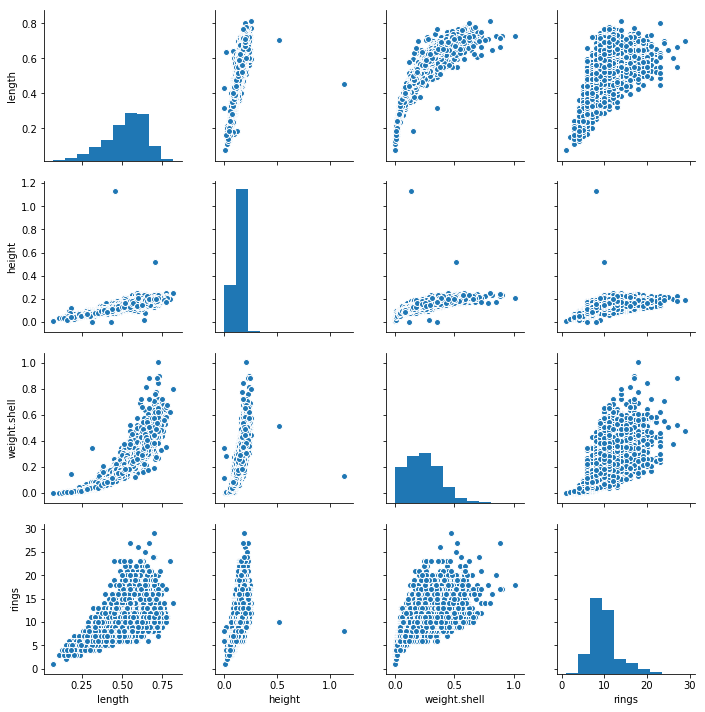

In [31]:
sns.pairplot(abalone, vars=['length', 'height', 'weight.shell', 'rings'])

In [32]:
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',sep='\s+', header=None)
cars.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']

cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


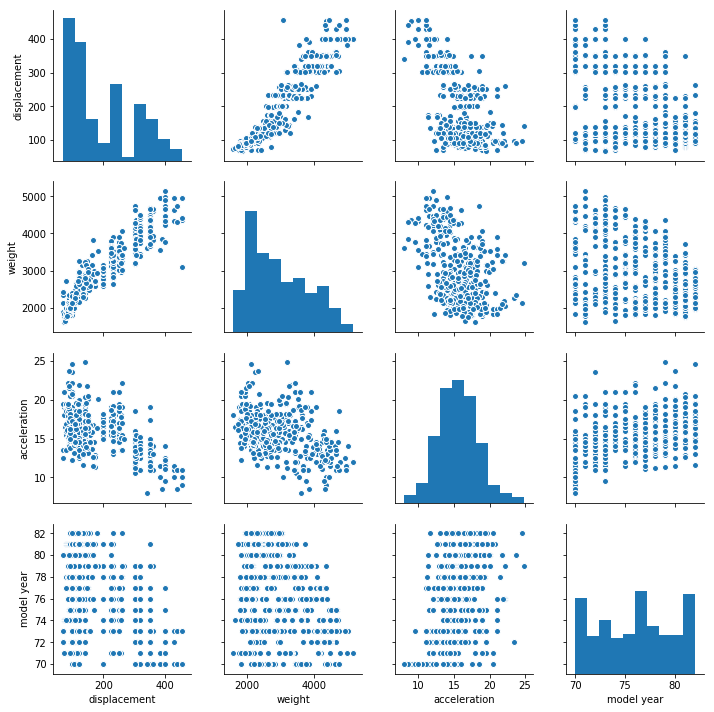

In [33]:
sns.pairplot(cars, vars=['displacement', 'weight', 'acceleration', 'model year'])

In [34]:
salary = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
salary.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week',
                  'native-country', 'adjusted-gross-income']

salary.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,adjusted-gross-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


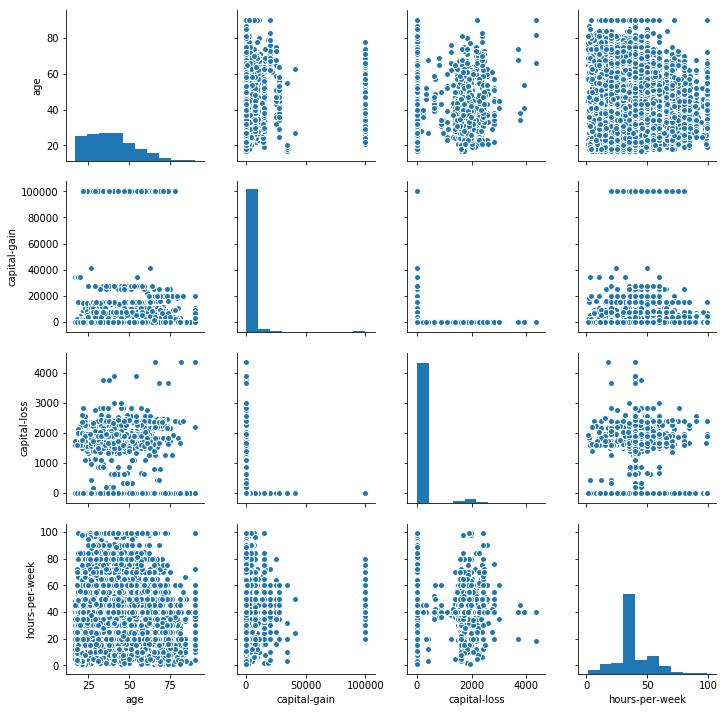

In [35]:
sns.pairplot(salary, vars=['age','capital-gain', 'capital-loss', 'hours-per-week'])

# Exercises

Pick one of the [datasets available here](https://github.com/mwaskom/seaborn-data), such as the exoplanets dataset planets.csv or the diet and exercise data set exercise.csv (or another). Practice the plots you learned above and try to make an awesome plot.

If you need some ideas on different types of plots, checkout:
* The [seaborn gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html)
* The [matplotlib gallery](http://matplotlib.org/gallery.html)


In [36]:
planets = sns.load_dataset('planets')
exercise = sns.load_dataset('exercise')

planets.method.value_counts()



Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

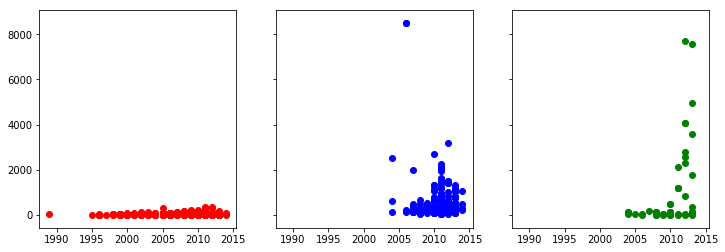

In [37]:
radial = planets[planets.method=='Radial Velocity']
transit = planets[planets.method=='Transit']
other = planets[~planets.method.isin(['Radial Velocity', 'Transit'])]

fig, axes = plt.subplots(ncols=3, nrows=1,figsize=(12,4), sharex=True, sharey=True)

axes[2].scatter(x='year', y='distance', data=other, c='g')
axes[1].scatter(x='year', y='distance', data=transit, c='b')
axes[0].scatter(x='year', y='distance', data=radial, c='r')

## Bokeh

Bokeh is another visualization library. There are many [example notebooks](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb) -- pick one and work through it.
